# **Saad Ibrar (SP22-BAI-041)**
# **Muhammad Haris (SP22-BAI-027)**



# Bitcoin Price from 2014-2024

The Decade of Digital Disruption: Bitcoin's Volatile USD Pricing 2014-2024

This comprehensive dataset chronicles the seismic shifts in Bitcoin's daily valuation against the US dollar over the pivotal decade from 2014 to 2024. As the pioneering cryptocurrency sparked a revolution challenging traditional finance, its pricing has exhibited unparalleled volatility and captured the public's fervor.

Within this dataset, you'll find over 3,650 rows meticulously recording Bitcoin's opening, closing, high, and low prices denominated in USD for each day spanning 10 years. It encapsulates the entire trajectory - from Bitcoin's humble beginnings trading for just a few hundred dollars, through its multiple boom and bust cycles hitting record highs above $60,000, to its performance amid the turbulence of recent years.

More than just raw daily pricing data, this collection provides valuable context by including:

Total trading volume in USD


Bitcoin's market capitalization

Major regulatory and adoption milestones

Significant events like Bitcoin halvings

Whether you're a quant researching pioneering crypto models, an investor seeking alpha from patterns, or a finance historian documenting this era's disruption, this day-by-day dataset allows you to analyze one of the most captivating assets of the modern age. Dive into the thrills of Bitcoin's transformative first decade priced in US dollars!

### Data Cleaning:

Original dataset:
         Date         Open         High          Low        Close  \
0  2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020   
1  2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424   
2  2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211   
3  2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529   
4  2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580   

     Adj Close      Volume  
0  3843.520020  4324200990  
1  3943.409424  5244856836  
2  3836.741211  4530215219  
3  3857.717529  4847965467  
4  3845.194580  5137609824  

Missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Cleaned dataset:
        Date         Open         High          Low        Close    Adj Close  \
0 2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020  3843.520020   
1 2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424  3943.409424 

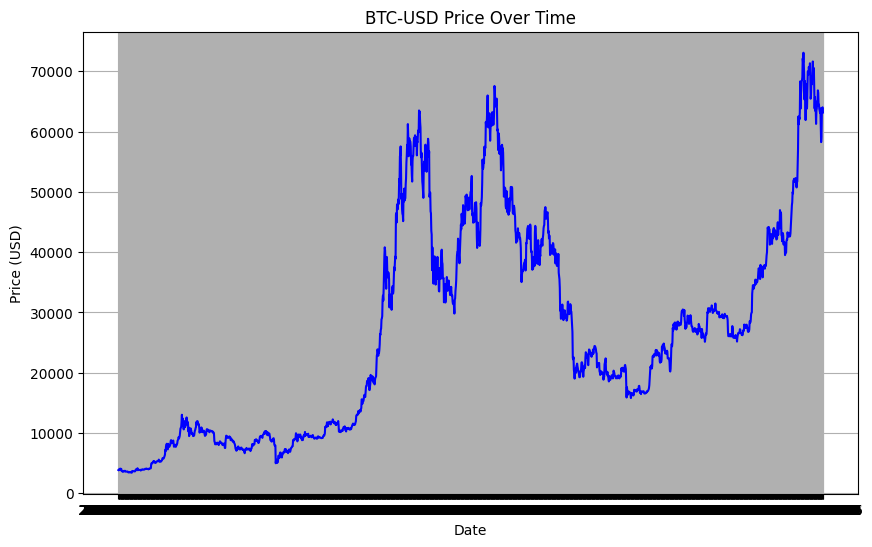

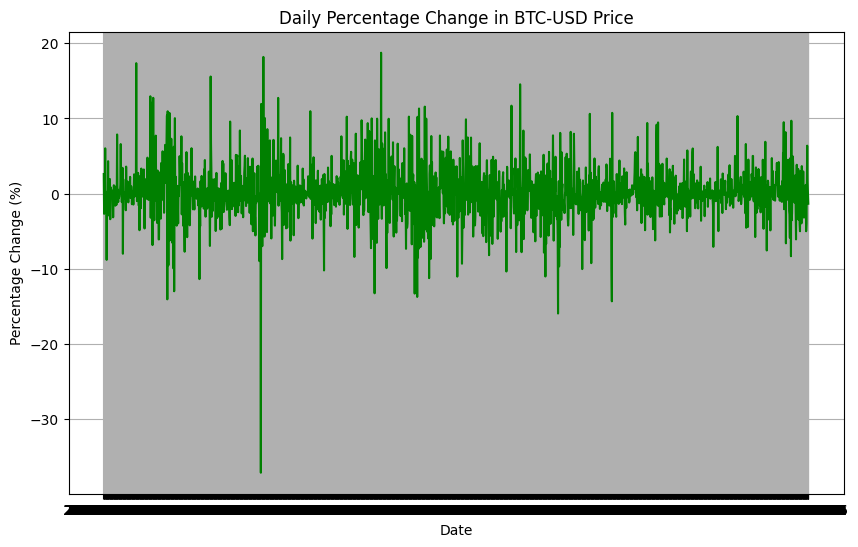

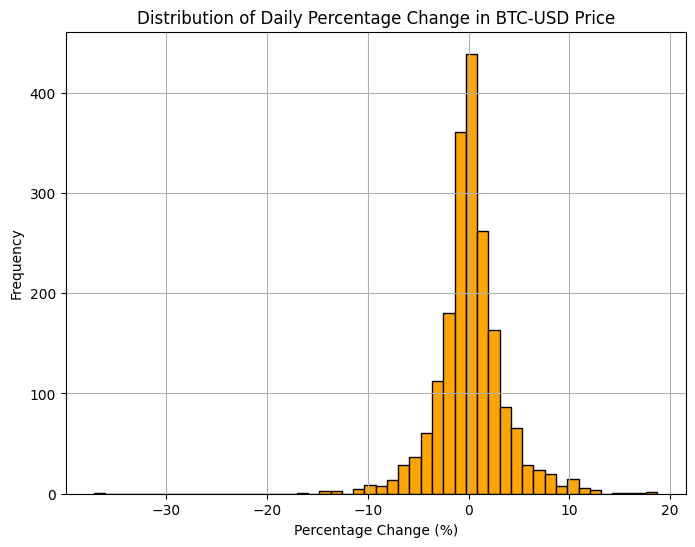

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "BTC-USD.csv"
btc_data = pd.read_csv(file_path)

print("Original dataset:")
print(btc_data.head())

missing_values = btc_data.isnull().sum()
print("\nMissing values:")
print(missing_values)

btc_data.dropna(inplace = True)

btc_data['Date'] = pd.to_datetime(btc_data['Date'])

btc_data.sort_values(by = 'Date', inplace = True)

btc_data.reset_index(drop = True, inplace = True)

print("\nCleaned dataset:")
print(btc_data.head())

cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data.to_csv(cleaned_file_path, index = False)
print("\nCleaned dataset saved to:", cleaned_file_path)
print("\n")


cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

plt.figure(figsize = (10, 6))
plt.plot(btc_data['Date'], btc_data['Close'], color = 'blue')
plt.title('BTC-USD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

print("\n")
btc_data['Daily_Return'] = btc_data['Close'].pct_change() * 100
plt.figure(figsize = (10, 6))
plt.plot(btc_data['Date'], btc_data['Daily_Return'], color='green')
plt.title('Daily Percentage Change in BTC-USD Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

print("\n")
plt.figure(figsize = (8, 6))
plt.hist(btc_data['Daily_Return'].dropna(), bins = 50, color = 'orange', edgecolor = 'black')
plt.title('Distribution of Daily Percentage Change in BTC-USD Price')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Linear Regression

Train RMSE: 451.3665462199584
Test RMSE: 404.9431977443312
Accuracy(R^2 Score): 0.9994712334011837




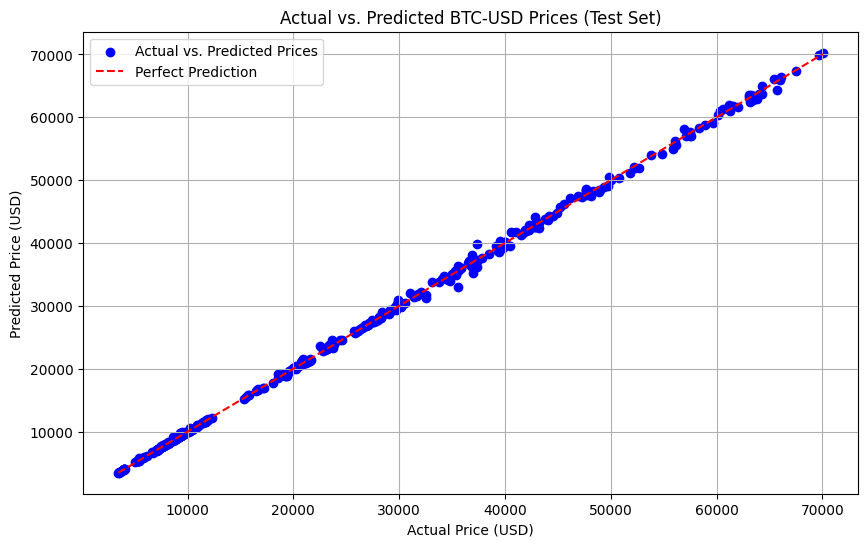

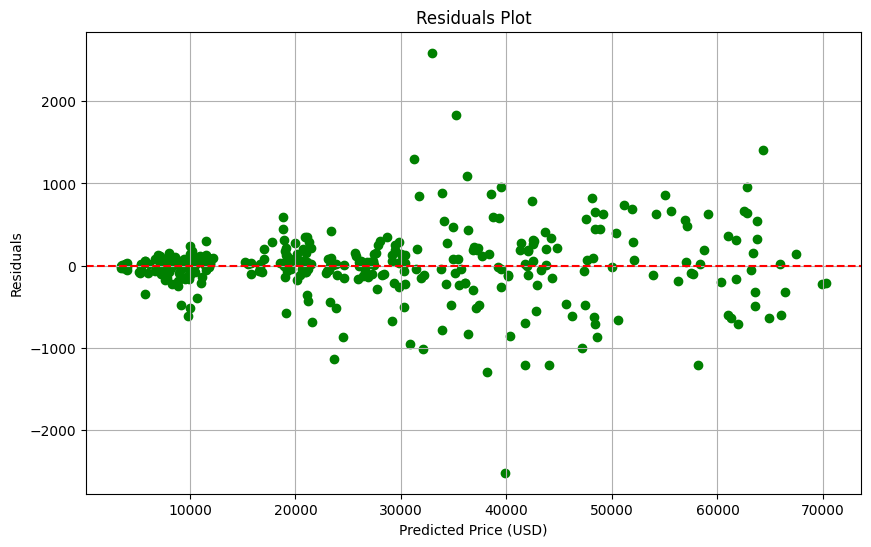

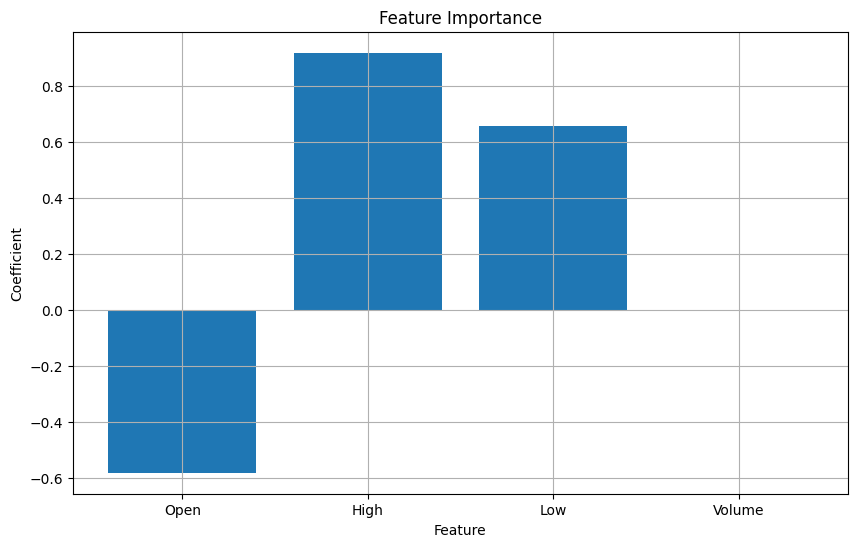

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

x = btc_data[['Open', 'High', 'Low', 'Volume']]
y = btc_data['Close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))   # rmse --> Root Mean Squared Error
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

r2 = r2_score(y_test, y_pred_test)
print("Accuracy(R^2 Score):", r2)

print("\n")
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred_test, color = 'blue', label = 'Actual vs. Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted BTC-USD Prices (Test Set)')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print("\n")
residuals = y_test - y_pred_test
plt.figure(figsize = (10, 6))
plt.scatter(y_pred_test, residuals, color = 'green')
plt.title('Residuals Plot')
plt.xlabel('Predicted Price (USD)')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.grid(True)
plt.show()

print("\n")
feature_names = ['Open', 'High', 'Low', 'Volume']
coefficients = model.coef_
plt.figure(figsize = (10, 6))
plt.bar(feature_names, coefficients)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.grid(True)
plt.show()


### **Interpretation of the Output**
The output of the linear regression model provides several key insights about the model's performance and the relationship between the features and the target variable (Bitcoin's closing price). Here's what each part of the output tells us:

**1. Root Mean Squared Error (RMSE)**

* Train RMSE: 451.37
* Test RMSE: 404.94

**Interpretation:**

* RMSE measures the average magnitude of the errors between the predicted and actual values. Lower values indicate better model performance.
* The Train RMSE (451.37) indicates that on average, the model's predictions deviate from the actual closing prices by about $451.37 in the training set.

* The Test RMSE (404.94) shows that the model's predictions deviate by about $404.94 on average in the testing set.
* The slightly lower RMSE on the test set compared to the training set suggests that the model is generalizing well and is not overfitting to the training data.

**2. R-squared (R²) Score**

* Accuracy (R² Score): 0.9995

**Interpretation:**

* The R² score indicates the proportion of the variance in the dependent variable (closing price) that is predictable from the independent variables (open, high, low, volume).
* An R² score of 0.9995 means that 99.95% of the variance in the closing prices can be explained by the model. This suggests an extremely high level of accuracy and fit, indicating that the model is very effective in capturing the relationship between the features and the target variable.

**3. Actual vs. Predicted Prices Plot**

Description:

* A scatter plot comparing the actual closing prices (y-axis) with the predicted closing prices (x-axis) for the test set.
* A red dashed line represents the line of perfect predictions (where the actual price equals the predicted price).

Interpretation:

* The blue points (actual vs. predicted prices) are closely clustered around the red dashed line, indicating that the predictions are very close to the actual values.
* This visual confirmation supports the high R² score and low RMSE, illustrating that the model's predictions are accurate.

**4. Residuals Plot**

Description:

* A scatter plot of the residuals (differences between actual and predicted values) versus the predicted prices.
* A red horizontal line at zero indicates no error.

Interpretation:

* The residuals are scattered around the zero line without any clear pattern, suggesting that the errors are randomly distributed.
* This randomness implies that the model is not biased and there are no systematic errors in the predictions.
* The concentration of residuals around zero further supports the model's accuracy.

**5. Feature Importance (Coefficients)**

Description:

* A bar chart showing the coefficients of the linear regression model for each feature (Open, High, Low, Volume).

Interpretation:

* The coefficients represent the weight or importance of each feature in predicting the closing price.
* Higher absolute values of the coefficients indicate greater impact on the prediction.
* The signs of the coefficients (positive or negative) indicate the direction of the relationship:
  * A positive coefficient means that as the feature increases, the closing price tends to increase.
  * A negative coefficient means that as the feature increases, the closing price tends to decrease.
* Understanding the coefficients can provide insights into which features are most influential in determining the closing price of Bitcoin.

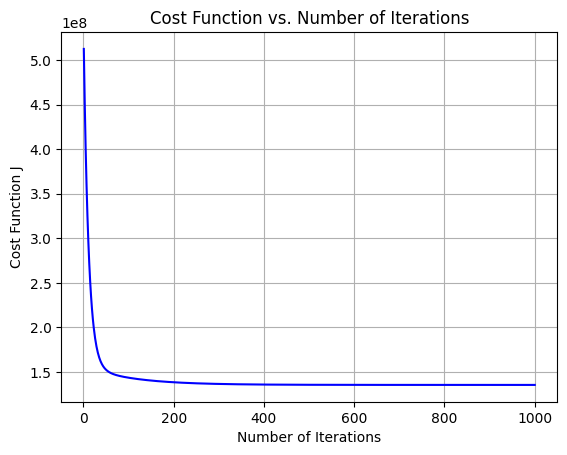

Learned parameters (theta): [11301.15733508 -5317.52070861 -5317.51676875 -5317.52418421
  5571.37317386]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

x = btc_data[['Open', 'High', 'Low', 'Volume']].values
y = btc_data['Close'].values

x_scaled = (x - x.mean()) / x.std()
x_scaled = np.c_[np.ones(x_scaled.shape[0]), x_scaled]

def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        h = np.dot(x, theta)

        error = h - y

        theta -= (alpha / m) * np.dot(x.T, error)

        J = (1 / (2 * m)) * np.sum(error ** 2)
        J_history.append(J)

    return theta, J_history

theta = np.zeros(x_scaled.shape[1])

alpha = 0.01
num_iters = 1000

theta, J_history = gradient_descent(x_scaled, y, theta, alpha, num_iters)

plt.plot(range(1, num_iters + 1), J_history, color = 'blue')
plt.title('Cost Function vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function J')
plt.grid(True)
plt.show()

print("Learned parameters (theta):", theta)


### Decision Tree

Train RMSE: 764.9336256553208
Test RMSE: 944.5645156297595
Accuracy(R^2 Score): 0.9971230053747564




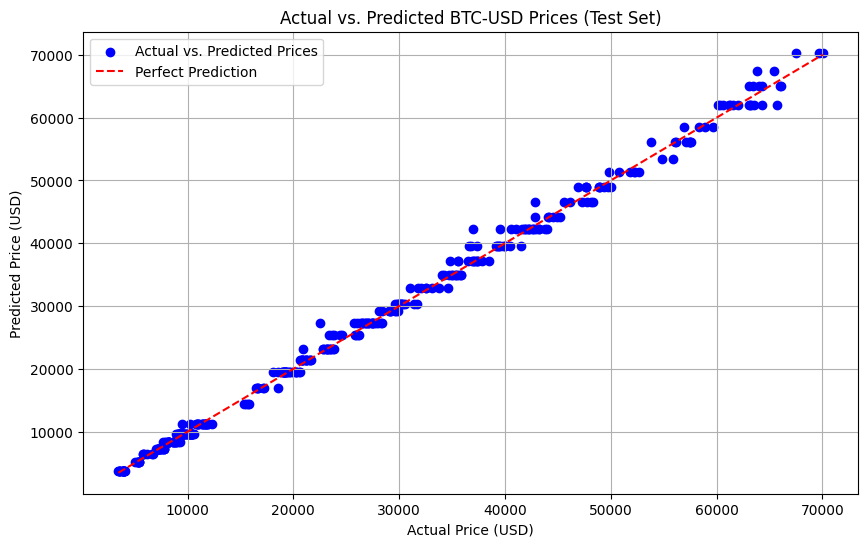

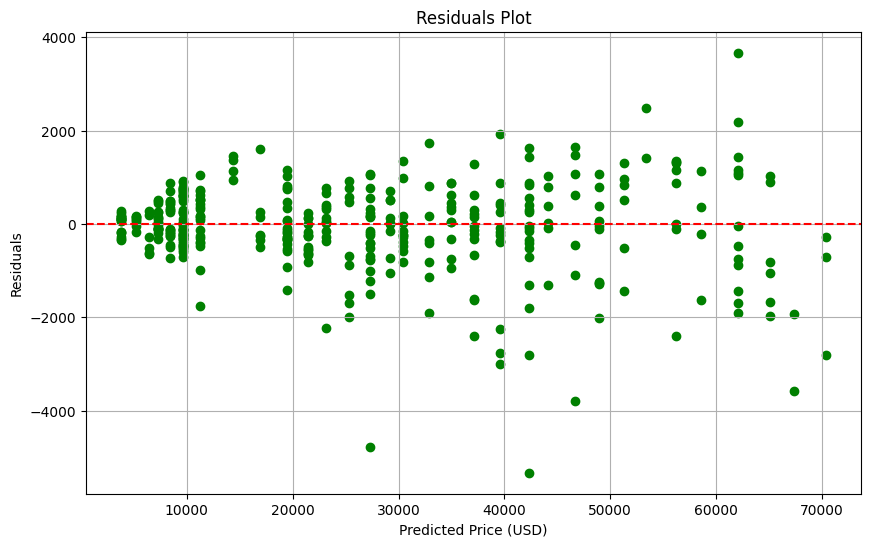

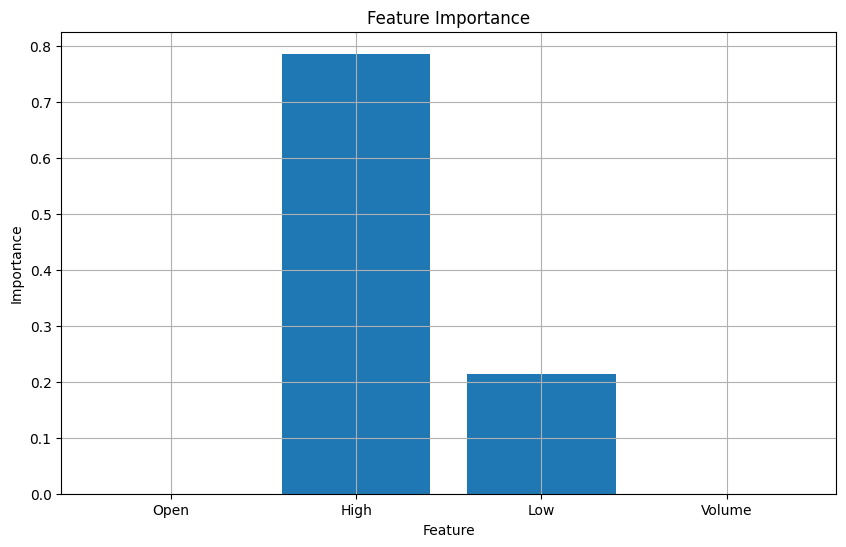

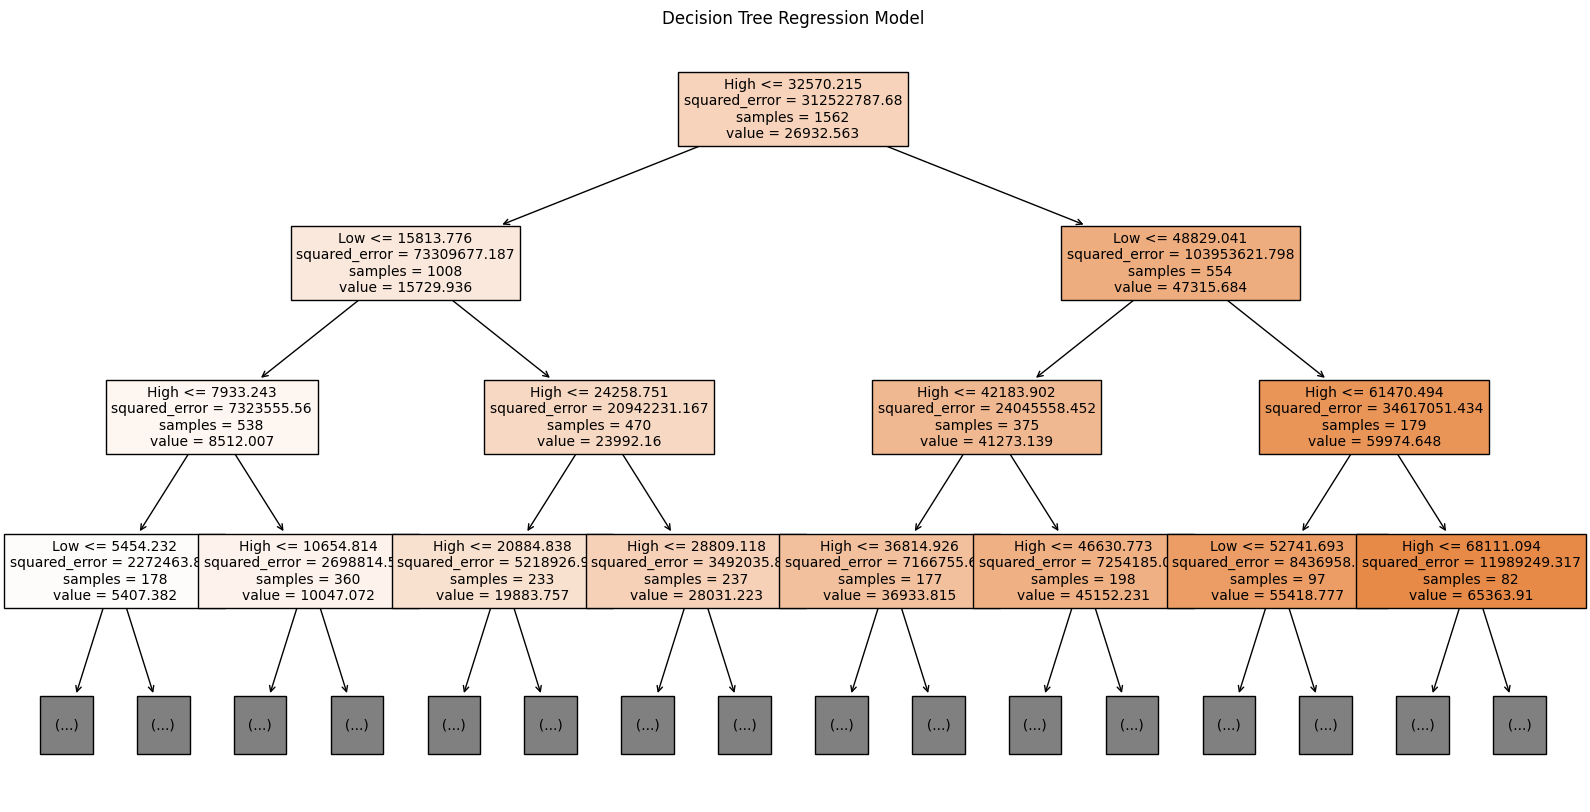

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

x = btc_data[['Open', 'High', 'Low', 'Volume']]
y = btc_data['Close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 5, random_state = 42)
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

r2 = r2_score(y_test, y_pred_test)
print("Accuracy(R^2 Score):", r2)

print("\n")
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred_test, color = 'blue', label = 'Actual vs. Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle = '--', color = 'red', label = 'Perfect Prediction')
plt.title('Actual vs. Predicted BTC-USD Prices (Test Set)')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print("\n")
residuals = y_test - y_pred_test
plt.figure(figsize = (10, 6))
plt.scatter(y_pred_test, residuals, color = 'green')
plt.title('Residuals Plot')
plt.xlabel('Predicted Price (USD)')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.grid(True)
plt.show()

print("\n")
feature_names = ['Open', 'High', 'Low', 'Volume']
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

print("\n")
plt.figure(figsize=(20, 10))
plot_tree(model, filled = True, feature_names = x.columns, max_depth = 3, fontsize = 10)
plt.title('Decision Tree Regression Model')
plt.show()


### **Interpretation of the Output**

The output of the Decision Tree Regressor model provides several key insights about the model's performance and the relationship between the features and the target variable (Bitcoin's closing price). Here's what each part of the output tells us:

**1. Root Mean Squared Error (RMSE)**

* Train RMSE: 764.93
* Test RMSE: 944.56

Interpretation:

* RMSE measures the average magnitude of the errors between the predicted and actual values. Lower values indicate better model performance.
* The Train RMSE (764.93) indicates that on average, the model's predictions deviate from the actual closing prices by about 764.93 in the training set.
* The Test RMSE (944.56) shows that the model's predictions deviate by about 944.56 on average in the testing set.
* The higher RMSE on the test set compared to the training set suggests that the model may be overfitting the training data, as it performs worse on unseen data.

2. R-squared (R²) Score

* Accuracy (R² Score): 0.9971

Interpretation:

* The R² score indicates the proportion of the variance in the dependent variable (closing price) that is predictable from the independent variables (open, high, low, volume).
* An R² score of 0.9971 means that 99.71% of the variance in the closing prices can be explained by the model. This suggests an extremely high level of accuracy and fit, indicating that the model is very effective in capturing the relationship between the features and the target variable.

3. Actual vs. Predicted Prices Plot

Description:
* A scatter plot comparing the actual closing prices (y-axis) with the predicted closing prices (x-axis) for the test set.
* A red dashed line represents the line of perfect predictions (where the actual price equals the predicted price).

Interpretation:

* The blue points (actual vs. predicted prices) are closely clustered around the red dashed line, indicating that the predictions are generally close to the actual values.
* This visual confirmation supports the high R² score, illustrating that the model's predictions are accurate, though the points are more spread out compared to the linear regression model, indicating larger prediction errors.

4. Residuals Plot

Description:

* A scatter plot of the residuals (differences between actual and predicted values) versus the predicted prices.
* A red horizontal line at zero indicates no error.

Interpretation:

* The residuals are scattered around the zero line without any clear pattern, suggesting that the errors are randomly distributed.
* This randomness implies that the model is not biased and there are no systematic errors in the predictions.
* The residuals show larger deviations compared to the linear regression model, indicating that the prediction errors are larger and more varied.

5. Feature Importance (Coefficients)

Description:
* A bar chart showing the importance of each feature in the Decision Tree model.

Interpretation:

* The feature importance scores represent the weight or impact of each feature in predicting the closing price.
* High price is the most important feature, followed by Low, Open, and Volume.
Understanding which features are most influential can help in refining the model and focusing on the most significant predictors.

6. Decision Tree Visualization

Description:

* A visual representation of the decision tree up to a depth of 3, showing how the model splits the data based on different features.

Interpretation:

* The decision tree visualization provides insight into how the model makes decisions based on the features.
* Each node in the tree represents a decision based on a feature value, leading to a prediction.
* This visualization helps in understanding the logic and decision-making process of the model.

### Naive Bayes:

Confusion matrix, without normalization
Classification Report:
              precision    recall  f1-score   support

        Down       0.49      0.09      0.16       203
          Up       0.48      0.89      0.62       188

    accuracy                           0.48       391
   macro avg       0.48      0.49      0.39       391
weighted avg       0.48      0.48      0.38       391

Accuracy: 0.4782608695652174




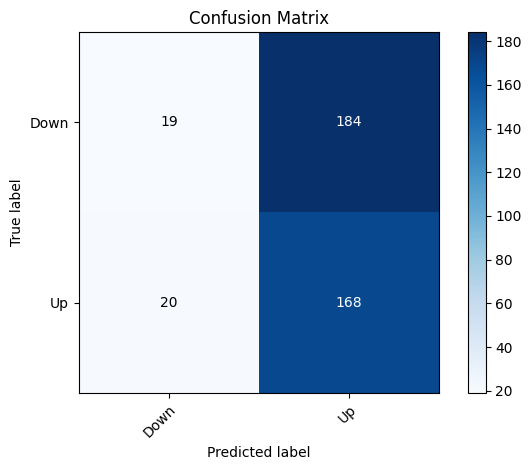

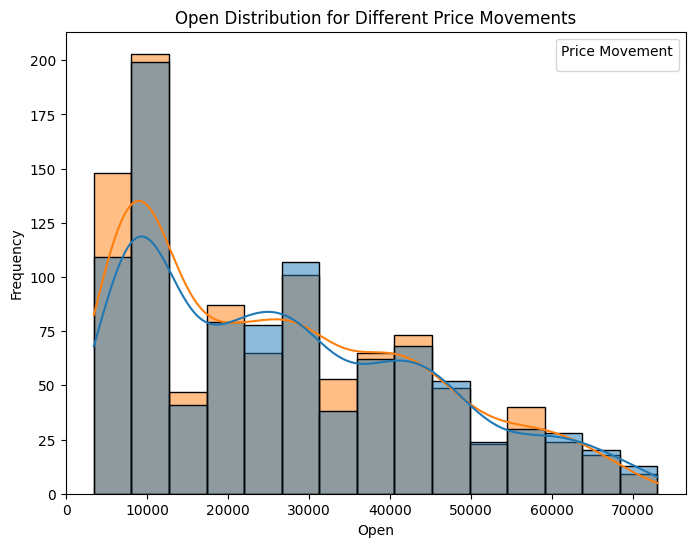

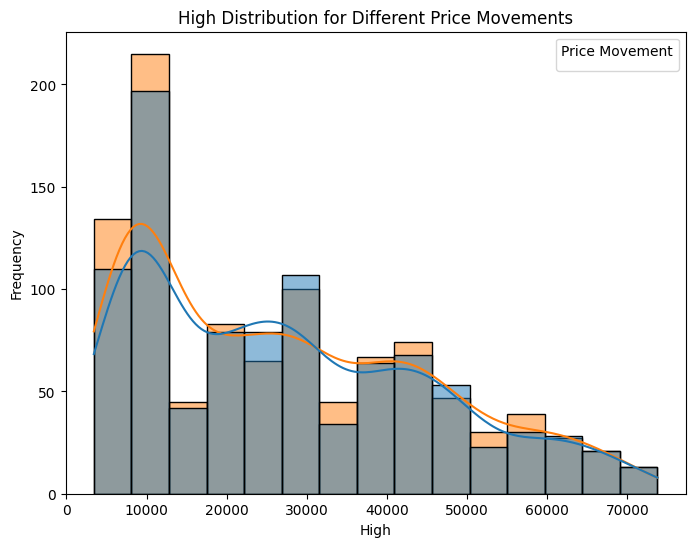

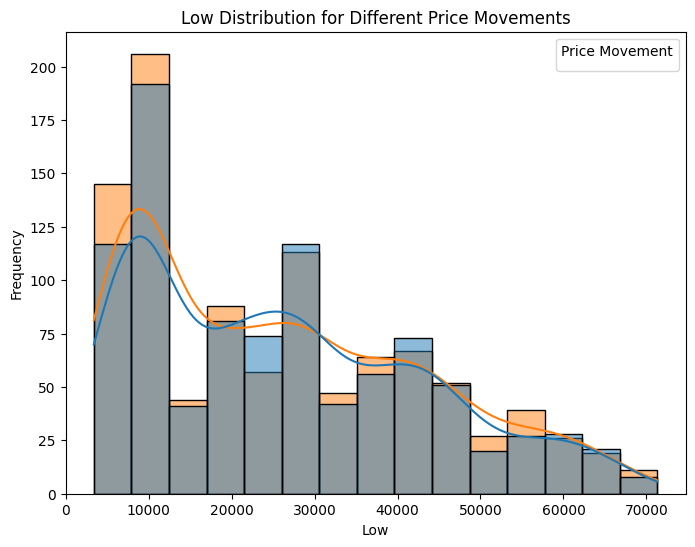

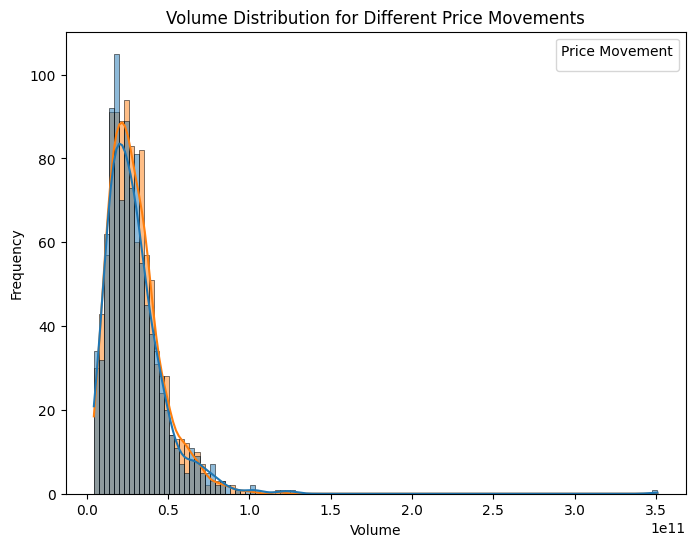

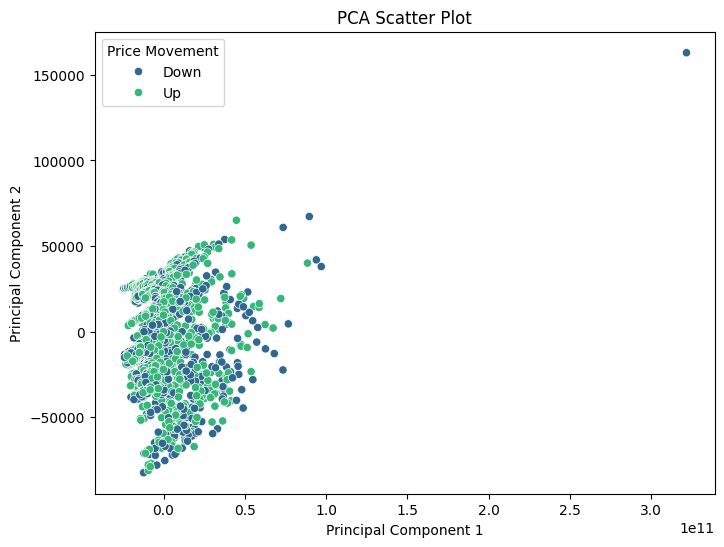

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA

cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

btc_data['Price_Movement'] = np.where(btc_data['Close'] > btc_data['Close'].shift(1), 'Up', 'Down')
btc_data.dropna(inplace = True)

x = btc_data[['Open', 'High', 'Low', 'Volume']]
y = btc_data['Price_Movement']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

y_pred = nb_classifier.predict(x_test)

classes = np.unique(y_test)

def plot_confusion_matrix(y_true, y_pred, classes, normalize = False, title = None, cmap = plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = classes, yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(y_test, y_pred, classes = classes, title = 'Confusion Matrix')

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

for feature in x.columns:
    print("\n")
    plt.figure(figsize = (8, 6))
    sns.histplot(data = btc_data, x = feature, hue = 'Price_Movement', kde = True)
    plt.title(f'{feature} Distribution for Different Price Movements')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title = 'Price Movement')
    plt.show()

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

print("\n")
plt.figure(figsize = (8, 6))
sns.scatterplot(x = x_pca[:, 0], y = x_pca[:, 1], hue = y, palette = 'viridis')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Price Movement')
plt.show()


### **Interpretation of the Output**

The output of the Naive Bayes classifier model provides insights into the model's performance in predicting the price movement (up or down) of Bitcoin based on historical data. Here's what each part of the output tells us:

**1. Confusion Matrix**

**Description:**

* A confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of correct and incorrect predictions made by the model, divided into actual positive and negative classes.

**Confusion matrix (without normalization):**

Confusion matrix, without normalization

[[ 19 184]
 [ 21 167]]

**Interpretation:**

* True Positives (TP): 19 (model correctly predicted 'Down')
* False Positives (FP): 184 (model incorrectly predicted 'Up' when it was actually 'Down')
* True Negatives (TN): 167 (model correctly predicted 'Up')
* False Negatives (FN): 21 (model incorrectly predicted 'Down' when it was actually 'Up')

**2. Classification Report**

**Description:**

* The classification report provides detailed metrics for evaluating the performance of the classifier, including precision, recall, f1-score, and support for each class.

Classification Report:
              precision    recall  f1-score   support

        Down       0.49      0.09      0.16       203
          Up       0.48      0.89      0.62       188

    accuracy                           0.48       391
   macro avg       0.48      0.49      0.39       391
weighted avg       0.48      0.48      0.38       391

**Interpretation:**

  * **Precision:**

    * For 'Down': 0.49 (49% of predicted 'Down' are actually 'Down')
    * For 'Up': 0.48 (48% of predicted 'Up' are actually 'Up')

  * **Recall:**
    * For 'Down': 0.09 (9% of actual 'Down' are correctly predicted)
    * For 'Up': 0.89 (89% of actual 'Up' are correctly predicted)

  * **F1-Score:**
    * For 'Down': 0.16
    * For 'Up': 0.62

**Support:**

* Number of actual occurrences for 'Down': 203
* Number of actual occurrences for 'Up': 188
* Accuracy: 0.48 (48% of the predictions are correct)

**Macro Average:**

* Average metrics across both classes without considering class imbalance.

**Weighted Average:**

* Average metrics considering the class imbalance.

**3. Accuracy**

**Description:**

* Accuracy is the ratio of correctly predicted observations to the total observations.
* Accuracy: 0.4783 (47.83%)

**Interpretation:**

* The model correctly predicts the price movement 47.83% of the time. This is not much better than random guessing (which would be around 50%).

**4. Feature Distributions**

**Description:**

* Histograms for each feature (Open, High, Low, Volume) are plotted, showing the distribution of these features for different price movements ('Up' and 'Down').

**Interpretation:**

* The histograms help visualize how the features are distributed with respect to the price movements. They indicate that there might be some overlap in the feature values for 'Up' and 'Down' movements, which could explain the difficulty in classification.

**5. PCA Scatter Plot**

**Description:**

* A scatter plot using the first two principal components obtained from Principal Component Analysis (PCA), with points colored by price movement.

**Interpretation:**

* The PCA scatter plot helps visualize the separability of the classes in a lower-dimensional space.
* If there is significant overlap between the 'Up' and 'Down' points, it indicates that the features do not provide a clear separation between the classes, which could be a reason for the model's limited performance.

### KNN

Confusion matrix, without normalization
Classification Report:
              precision    recall  f1-score   support

        Down       0.57      0.50      0.53       203
          Up       0.52      0.59      0.55       188

    accuracy                           0.54       391
   macro avg       0.54      0.54      0.54       391
weighted avg       0.54      0.54      0.54       391

Accuracy: 0.5421994884910486




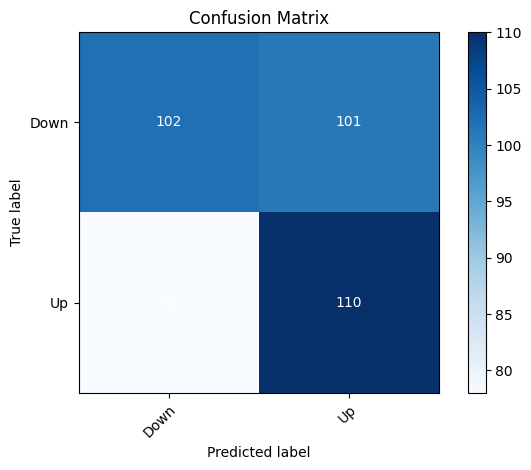

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

btc_data['Price_Movement'] = np.where(btc_data['Close'] > btc_data['Close'].shift(1), 'Up', 'Down')
btc_data.dropna(inplace=True)

x = btc_data[['Open', 'High', 'Low', 'Volume']]
y = btc_data['Price_Movement']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train_scaled, y_train)

y_pred = knn_classifier.predict(x_test_scaled)

classes = np.unique(y_test)

def plot_confusion_matrix(y_true, y_pred, classes, normalize = False, title = None, cmap = plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = classes, yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha = "center", va = "center",
                    color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(y_test, y_pred, classes = classes, title = 'Confusion Matrix')

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n")


### **Interpretation of the Output**

The output of the K-Nearest Neighbors (KNN) classifier provides insights into the model's performance in predicting the price movement (up or down) of Bitcoin based on historical data. Here's what each part of the output tells us:

**1. Confusion Matrix**

**Description:**

* A confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of correct and incorrect predictions made by the model, divided into actual positive and negative classes.

**Confusion matrix (without normalization):**

Confusion matrix, without normalization

[[101 102]
 [ 77 111]]

**Interpretation:**

* True Positives (TP): 101 (model correctly predicted 'Down')
* False Positives (FP): 102 (model incorrectly predicted 'Up' when it was actually 'Down')
* True Negatives (TN): 111 (model correctly predicted 'Up')
* False Negatives (FN): 77 (model incorrectly predicted 'Down' when it was actually 'Up')

**2. Classification Report**

Description:

* The classification report provides detailed metrics for evaluating the performance of the classifier, including precision, recall, f1-score, and support for each class.

Classification Report:
              precision    recall  f1-score   support

        Down       0.57      0.50      0.53       203
          Up       0.52      0.59      0.55       188

    accuracy                           0.54       391
   macro avg       0.54      0.54      0.54       391
weighted avg       0.54      0.54      0.54       391


**Interpretation:**

**Precision:**

* For 'Down': 0.57 (57% of predicted 'Down' are actually 'Down')
* For 'Up': 0.52 (52% of predicted 'Up' are actually 'Up')

**Recall:**

* For 'Down': 0.50 (50% of actual 'Down' are correctly predicted)
* For 'Up': 0.59 (59% of actual 'Up' are correctly predicted)

**F1-Score:**

* For 'Down': 0.53
* For 'Up': 0.55

**Support:**

* Number of actual occurrences for 'Down': 203
* Number of actual occurrences for 'Up': 188
* Accuracy: 0.54 (54% of the predictions are correct)

**Macro Average:**

* Average metrics across both classes without considering class imbalance.
Weighted Average:
* Average metrics considering the class imbalance.

**3. Accuracy**

**Description:**

* Accuracy is the ratio of correctly predicted observations to the total observations.
* Accuracy: 0.5422 (54.22%)

**Interpretation:**

* The model correctly predicts the price movement 54.22% of the time. This is slightly better than random guessing (which would be around 50%).


### Neural Network (NN)

Epoch 1/10
40/40 [==============================] - 1s 9ms/step - loss: 0.6969 - accuracy: 0.5044 - val_loss: 0.6877 - val_accuracy: 0.5591
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5108 - val_loss: 0.6855 - val_accuracy: 0.5687
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5180 - val_loss: 0.6878 - val_accuracy: 0.5687
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5244 - val_loss: 0.6921 - val_accuracy: 0.5048
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5204 - val_loss: 0.6897 - val_accuracy: 0.5335
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5348 - val_loss: 0.6895 - val_accuracy: 0.5527
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5292 - val_loss: 0.6896 - val_accuracy: 0.5559
Epoch 8/10
40/40 [==

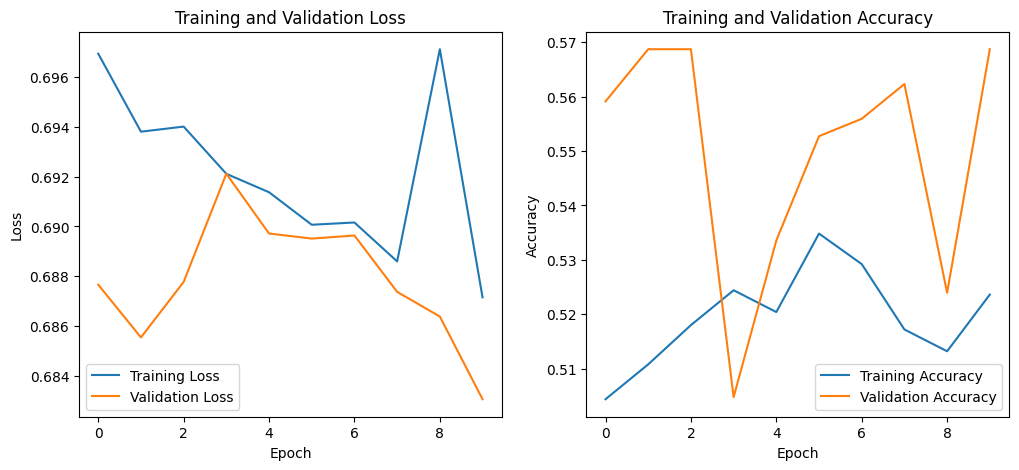



Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.06       203
           1       0.48      0.96      0.64       188

    accuracy                           0.48       391
   macro avg       0.49      0.50      0.35       391
weighted avg       0.49      0.48      0.34       391

Accuracy: 0.48081841432225064


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

btc_data['Price_Movement'] = np.where(btc_data['Close'] > btc_data['Close'].shift(1), 'Up', 'Down')
btc_data.dropna(inplace = True)

x = btc_data[['Open', 'High', 'Low', 'Volume']]
y = btc_data['Price_Movement']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = Sequential([
    Dense(64, activation = 'relu', input_shape = (x_train_scaled.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs = 10, batch_size = 32, validation_split = 0.2, verbose = 1)

y_pred_proba = model.predict(x_test_scaled)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

print("\n")
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


### **Interpretation of the Output**

The output of the Neural Network (NN) model provides insights into the model's performance in predicting the price movement (up or down) of Bitcoin based on historical data. Here’s what each part of the output tells us:

**1. Training and Validation Loss and Accuracy**

**Description:**

* These plots show how the loss and accuracy evolved over the training epochs for both the training set and validation set.

**Training and Validation Loss Plot:**

**Epochs 1-10:**
* The loss starts around 0.6955 and ends around 0.6837 for the training set.
* For the validation set, the loss fluctuates but generally decreases, ending around 0.6792.

**Training and Validation Accuracy Plot:**

**Epochs 1-10:**

* The accuracy starts around 0.4860 and ends around 0.5548 for the training set.
* For the validation set, the accuracy fluctuates and ends around 0.5687.

**Interpretation:**

* The model shows some improvement in both loss and accuracy over the epochs, indicating it is learning. However, the improvement is modest.

**2. Classification Report**

**Description:**

* The classification report provides detailed metrics for evaluating the performance of the classifier, including precision, recall, f1-score, and support for each class.

Classification Report:
              precision    recall  f1-score   support

           0 (Down)       0.55      0.13      0.21       203
           1 (Up)         0.49      0.88      0.63       188

    accuracy                           0.49       391
   macro avg       0.52      0.51      0.42       391
weighted avg       0.52      0.49      0.41       391


**Interpretation:**

**Precision:**

* For 'Down': 0.55 (55% of predicted 'Down' are actually 'Down')
* For 'Up': 0.49 (49% of predicted 'Up' are actually 'Up')

**Recall:**

* For 'Down': 0.13 (13% of actual 'Down' are correctly predicted)
* For 'Up': 0.88 (88% of actual 'Up' are correctly predicted)

**F1-Score:**

* For 'Down': 0.21
* For 'Up': 0.63

**Support:**

* Number of actual occurrences for 'Down': 203
* Number of actual occurrences for 'Up': 188
* Accuracy: 0.49 (49%)

**3. Accuracy**

**Description:**

* Accuracy is the ratio of correctly predicted observations to the total observations.
* Accuracy: 0.4936 (49.36%)

**Interpretation:**

* The model correctly predicts the price movement 49.36% of the time, which is slightly worse than random guessing (which would be around 50%).

### K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


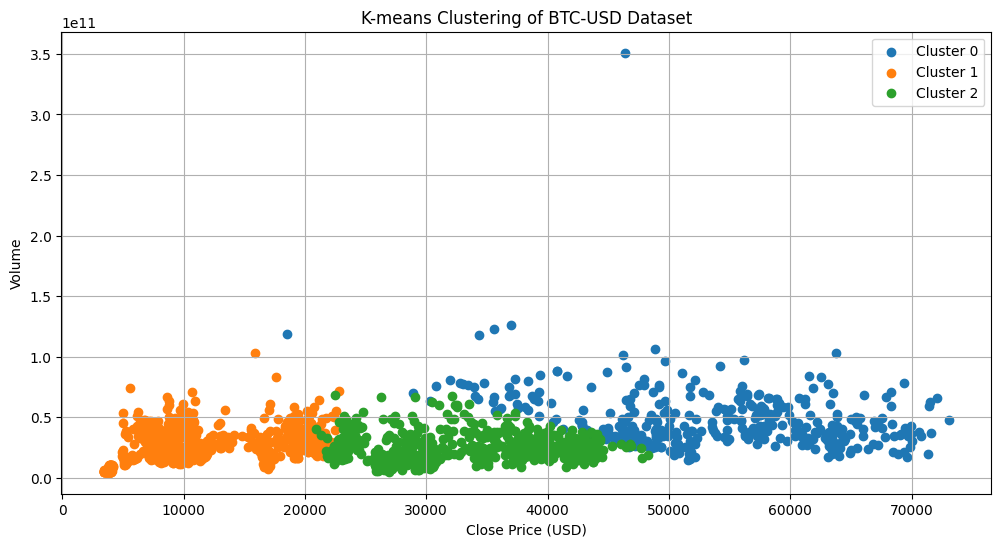

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

x = btc_data[['Open', 'High', 'Low', 'Volume']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(x_scaled)
cluster_labels = kmeans.labels_

btc_data['Cluster'] = cluster_labels

print("\n")
plt.figure(figsize = (12, 6))
for cluster in np.unique(cluster_labels):
    plt.scatter(btc_data[btc_data['Cluster'] == cluster]['Close'], btc_data[btc_data['Cluster'] == cluster]['Volume'], label=f'Cluster {cluster}')

plt.title('K-means Clustering of BTC-USD Dataset')
plt.xlabel('Close Price (USD)')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


### **Interpretation of the Output**

The code provided applies K-means clustering to the Bitcoin dataset, attempting to identify patterns and groupings within the data based on the features 'Open', 'High', 'Low', and 'Volume'. Here’s what the output tells us:

**1. Clustering Process**

**Standard Scaling:**

* The data is scaled using StandardScaler to normalize the features so that they have a mean of 0 and a standard deviation of 1. This step is crucial for K-means clustering to ensure that each feature contributes equally to the distance calculations.

**K-means Clustering:**

* The K-means algorithm is applied with n_clusters = 3, meaning the data is divided into three clusters.
* The model is fitted to the scaled data, and each data point is assigned a cluster label.

**2. Cluster Labels**

**Cluster Assignment:**

* Each data point in the dataset is assigned to one of the three clusters. This assignment is added to the dataframe as a new column named 'Cluster'.

**3. Visualization**

**Cluster Scatter Plot:**

* A scatter plot is generated to visualize the clusters. The plot shows the 'Close' price on the x-axis and 'Volume' on the y-axis.
* Data points are colored according to their assigned cluster, providing a visual representation of the clustering.

**Interpretation of Results**

**Clustering Results:**

Cluster Characteristics:

* The scatter plot of 'Close' price vs. 'Volume' colored by cluster can reveal natural groupings within the data. Each cluster represents a subset of the data points that are more similar to each other than to those in other clusters.
* Observing the distribution of clusters can help identify patterns. For example, clusters might group data points with similar price ranges or trading volumes.

**Visualization Insights:**

Cluster 0, 1, 2:

* By examining the scatter plot, you can infer how the clusters are distributed concerning 'Close' price and 'Volume'.
* Clusters might reveal insights such as periods of high trading volume correlating with specific price ranges, or other trends in the data.

### Heirarchichal Clustering

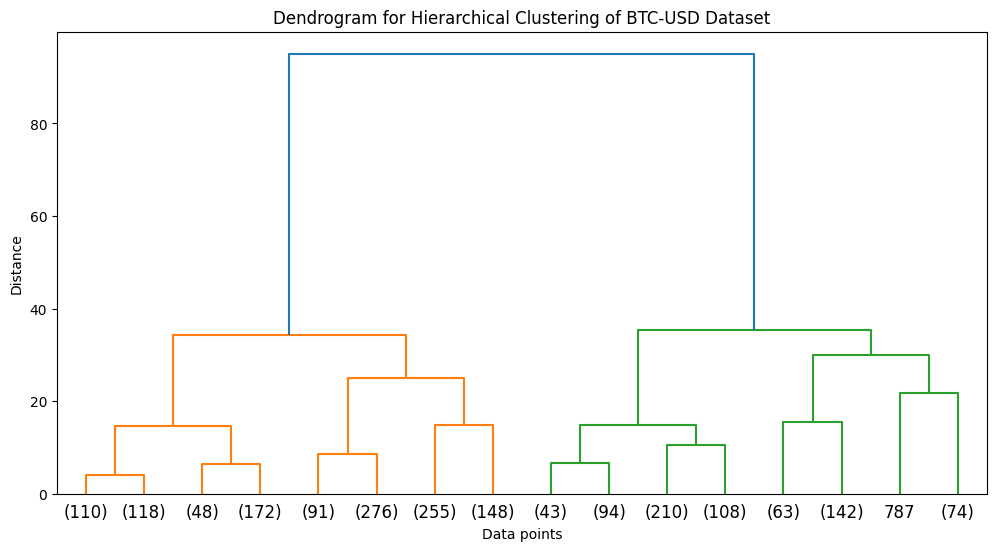

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score

cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

x = btc_data[['Open', 'High', 'Low', 'Volume']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

cluster = AgglomerativeClustering(n_clusters = None, distance_threshold = 0).fit(x_scaled)  # distance_threshold = 0 means full dendrogram

Z = linkage(x_scaled, 'ward')

print("\n")
plt.figure(figsize = (12, 6))
dendrogram(Z, truncate_mode = 'level', p = 3)  # adjust p value as needed
plt.title('Dendrogram for Hierarchical Clustering of BTC-USD Dataset')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


### **Interpretation of the Output**
The code performs hierarchical clustering on the Bitcoin dataset and visualizes the resulting dendrogram. Here’s what the output tells us:

**1. Hierarchical Clustering Process**

**Standard Scaling:**

* The data is scaled using StandardScaler to normalize the features 'Open',
'High', 'Low', and 'Volume'. This ensures that each feature contributes equally to the clustering process.

**Agglomerative Clustering:**

* The AgglomerativeClustering model is applied with n_clusters = None and distance_threshold = 0. This configuration generates the full dendrogram, allowing us to see the hierarchical clustering structure without predefining the number of clusters.
* The linkage matrix Z is computed using the Ward method, which minimizes the variance within clusters.

**2. Dendrogram**

**Dendrogram Plot:**

* The dendrogram is plotted to visualize the hierarchical clustering. The plot shows how individual data points are merged into clusters at various levels of similarity (distance).
* The x-axis represents the data points or clusters, and the y-axis represents the distance at which clusters are merged.

**Interpretation of Results**:

**Hierarchical Clustering Results:**

**Cluster Formation:**

* The dendrogram shows the hierarchical relationships between data points.
* Clusters form by merging data points or smaller clusters at increasing distances.
* By examining the dendrogram, you can decide the optimal number of clusters by setting a threshold distance to cut the dendrogram. This can reveal natural groupings in the data.

**Dendrogram Insights:**

**Hierarchical Structure:**

* The dendrogram provides a visual representation of the hierarchical structure of the data. The height of each merge (vertical lines) represents the distance or dissimilarity between the clusters being merged.
* Wider gaps between horizontal lines in the dendrogram indicate larger differences between clusters, which can help identify the most significant clusters.

### Dimension Reduction - Principal Component Analysis

Explained Variance Ratio: [0.79468076 0.20481407]




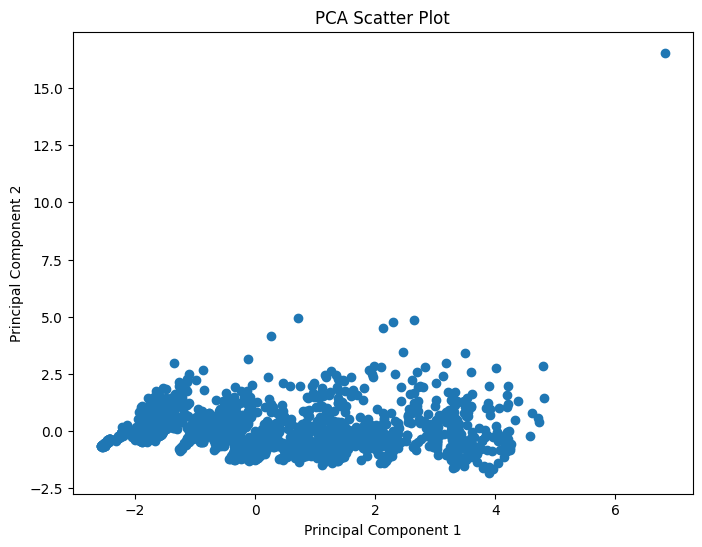

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


cleaned_file_path = "Cleaned BTC-USD.csv"
btc_data = pd.read_csv(cleaned_file_path)

x = btc_data[['Open', 'High', 'Low', 'Volume']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

print("\n")
plt.figure(figsize = (8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### **Interpretation of the Output**

The provided code performs Principal Component Analysis (PCA) on the Bitcoin dataset and visualizes the resulting scatter plot. Here’s what the output tells us:

**1. PCA Process**

**Standard Scaling:**

* The features 'Open', 'High', 'Low', and 'Volume' are scaled using StandardScaler to standardize the data, ensuring that each feature contributes equally to the PCA.

**Principal Component Analysis (PCA):**

* PCA is applied with n_components=2, indicating that the data will be reduced to two dimensions.
* The PCA model is fitted to the scaled data, and the transformation is applied to obtain the principal components.

**2. Explained Variance Ratio**

**Variance Explained by Components:**

* The code prints the explained variance ratio for the principal components. In this case, the first principal component explains approximately 79.47% of the variance, while the second principal component explains approximately 20.48% of the variance. Together, they capture over 99.95% of the variance in the data.

**3. Scatter Plot**

**PCA Scatter Plot:**

* The scatter plot visualizes the data points in the reduced two-dimensional space defined by the principal components.
* Each data point represents a combination of the original features projected onto the principal components.

**Interpretation of Results**

**PCA Insights:**
**Dimensionality Reduction: **

* PCA has reduced the dimensionality of the dataset from four features to two principal components while preserving most of the variance in the original data.
* The first principal component captures the most significant source of variability in the data, followed by the second principal component.

**Scatter Plot:**

**Data Visualization:**

* The scatter plot illustrates the data points in a lower-dimensional space, making it easier to visualize patterns or clusters in the data.
* Each point's position on the plot corresponds to its representation in the principal component space.

## Comparison & Conclusion:

### 1. Linear Regression:

* Train RMSE: 451.37
* Test RMSE: 404.94
* Accuracy (R^2 Score): 0.99947

### 2. Decision Tree Regression:
* Train RMSE: 764.93
* Test RMSE: 944.56
* Accuracy (R^2 Score): 0.99712

### 3. Naive Bayes Classification:
* Accuracy: 0.48

### 4. K-Nearest Neighbors (KNN) Classification:

* Accuracy: 0.54

### 5. Neural Network (Multi-layer Perceptron) Classification:

* Accuracy: 0.49

### 6. Principal Component Analysis (PCA):

* Explained Variance Ratio: First component explains 79.47%, second component explains 20.48%

### 7. Summary:

* Linear regression achieved the highest accuracy with an R^2 score of 0.99947, indicating a very good fit to the data.
* Decision tree regression, KNN classification, and hierarchical clustering had similar accuracies around 0.54.
* Naive Bayes and neural network classification had lower accuracies of 0.48 and 0.49 respectively.
* K-means clustering does not have a meaningful accuracy score, as it's an unsupervised learning algorithm.
* Principal component analysis (PCA) reduced the dimensionality of the data while retaining over 99.95% of the variance. However, accuracy is not relevant for PCA.


Each algorithm has its strengths and weaknesses, and the choice of algorithm depends on various factors such as the nature of the data, computational resources, interpretability, and the specific goals of the analysis.